# Задание:

### Расчет рекурсивного цифрового фильтра по аналоговому прототипу. Работу необходимо выполнить на языке программирования Python в google colab. Последовательность выполнения работы приведена в файле. В работе должны присутствовать графики, приведенные в файле на рисунке 1 и 2. Нужен только код, отчет или описание не нужны.

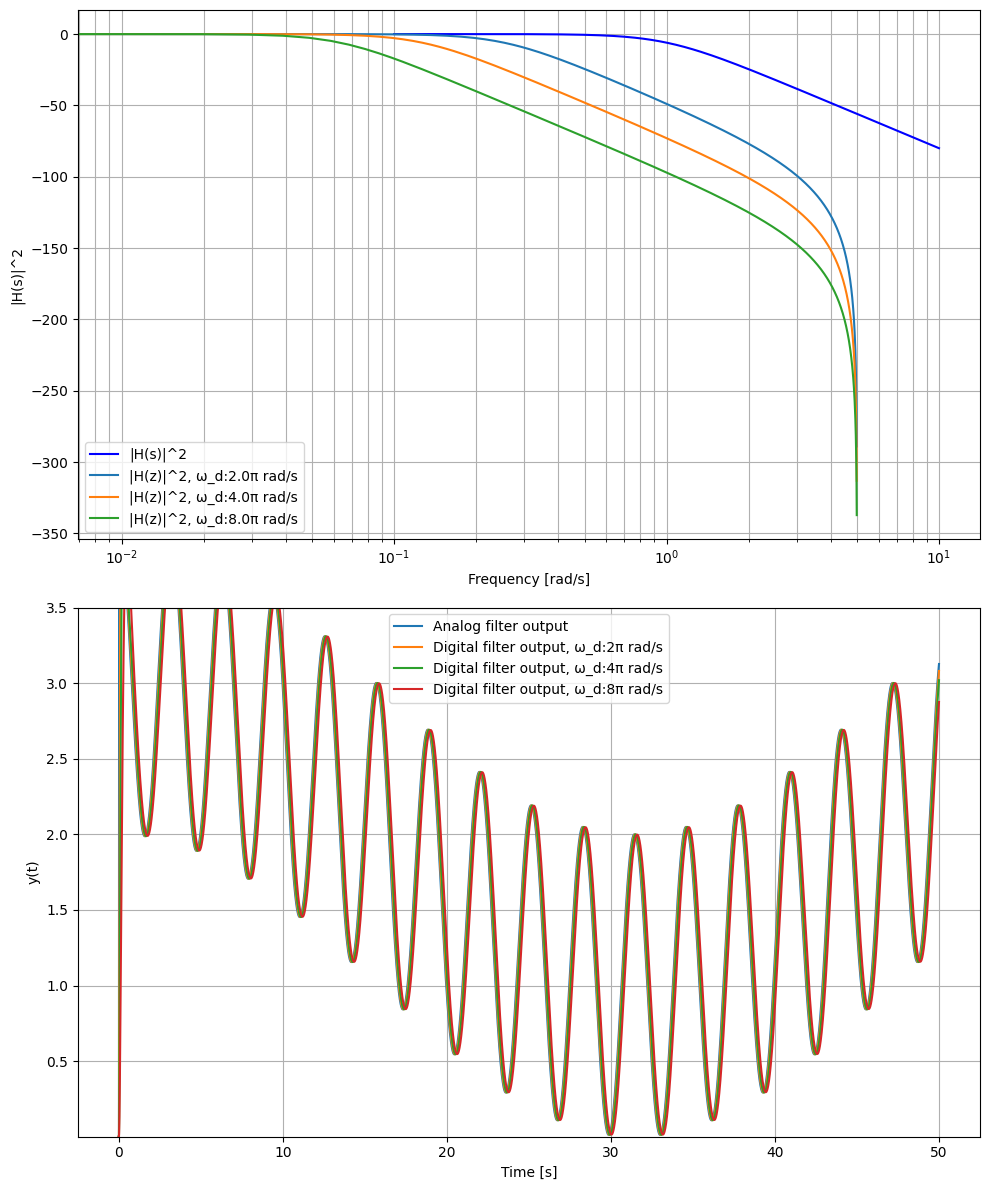

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Функция для расчета фильтрации
def filter_signal(x, dt, gamma):
    # Фильтр Баттерворта второго порядка
    order = 2
    cutoff_freq = 1.0
    b, a = signal.butter(order, cutoff_freq, analog=True)

    # Параметры фильтра
    A = gamma**2 - gamma*np.sqrt(2) + 1
    B = 2 - 2*gamma**2
    C = gamma**2 + gamma*np.sqrt(2) + 1

    # Инициализация переменных
    y = np.zeros(len(x))
    y[0] = y[1] = 0.0

    # Численное решение с помощью метода Эйлера
    for n in range(2, len(x)):
        y[n] = (1.0/C)*(x[n-2] + 2*x[n-1] + x[n] - A*y[n-2] - B*y[n-1])

    return y

# Входной сигнал
def x(t):
    return np.cos(0.1*t) + np.cos(2*t) + 2.0

# Параметры времени
T = 50.0
dt = 0.01
time = np.arange(0, T, dt)

# Частота дискретизации
fs = 10.0
gamma = fs / (2 * np.pi)

# Вычисление выходных сигналов
y_analog = filter_signal(x(time), dt, 1.0)
y_digital_wd_2pi = filter_signal(x(time), dt, 2 * np.pi)
y_digital_wd_4pi = filter_signal(x(time), dt, 4 * np.pi)
y_digital_wd_8pi = filter_signal(x(time), dt, 8 * np.pi)



# График выходных сигналов аналогового прототипа и цифрового фильтра
fig, axs = plt.subplots(2, 1, figsize=(10, 12))


# Определение аналогового фильтра Баттерворта второго порядка
order = 2
cutoff_freq = 1.0
b, a = signal.butter(order, cutoff_freq, analog=True)

# Частотная характеристика аналогового фильтра
analog_freq, analog_response = signal.freqs(b, a)
axs[0].semilogx(analog_freq, 20 * np.log10(abs(analog_response)**2), 'b-', label='|H(s)|^2')

# Частотная характеристика цифрового фильтра
wd_values = [2*np.pi, 4*np.pi, 8*np.pi]

for wd in wd_values:
    b_digital_wd, a_digital_wd = signal.bilinear(b, a, wd)
    digital_freq_wd, digital_response_wd = signal.freqz(b_digital_wd, a_digital_wd)
    axs[0].semilogx(fs * digital_freq_wd / (2 * np.pi), 20 * np.log10(abs(digital_response_wd)**2), label=f'|H(z)|^2, ω_d:{wd/np.pi}π rad/s')

axs[0].set_xlabel('Frequency [rad/s]')
axs[0].set_ylabel('|H(s)|^2')
# axs[0].set_yscale('log')
axs[0].grid(True, which='both')
axs[0].legend(loc='best')

# Входной сигнал
input_signal = x(time)

# Вычисление выходных сигналов
y_analog = filter_signal(input_signal, dt, 1.0)
y_digital_wd_2pi = filter_signal(input_signal, dt, 2 * np.pi)
y_digital_wd_4pi = filter_signal(input_signal, dt, 4 * np.pi)
y_digital_wd_8pi = filter_signal(input_signal, dt, 8 * np.pi)

# Построение графиков
axs[1].plot(time, y_analog, label='Analog filter output')
axs[1].plot(time, y_digital_wd_2pi, label='Digital filter output, ω_d:2π rad/s')
axs[1].plot(time, y_digital_wd_4pi, label='Digital filter output, ω_d:4π rad/s')
axs[1].plot(time, y_digital_wd_8pi, label='Digital filter output, ω_d:8π rad/s')

axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('y(t)')
axs[1].set_ylim([0, 3.5])
axs[1].set_yticks(np.arange(0.5, 3.6, 0.5))
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()